# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [81]:
# Libraries and Tooling
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [82]:
# Data importation
df = pd.read_csv("recipe_site_traffic_2212.csv")

In [83]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Basic data inspection
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

imput missing values with median

In [84]:
# Impute missing values with median
for column in df.select_dtypes(include=[np.number]).columns:
    median_value = df[column].mean()
    df[column].fillna(median_value, inplace=True)

# Verify if missing values are imputed
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    373
dtype: int64


In [85]:
# Summary statistics
print("\nSummary statistics of numerical:")
display(df.describe())

# Check for duplicates
print(f"\nNumber of duplicate recipe IDs: {df['recipe'].duplicated().sum()}")


Summary statistics of numerical:


,recipe,calories,carbohydrate,sugar,protein
count,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,440.394131,42.724059,14.270029,35.356020
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000
50%,474.000000,313.530000,23.170000,5.050000,12.120000
75%,710.500000,576.225000,42.590000,9.285000,28.530000
max,947.000000,3633.160000,530.420000,148.750000,363.360000



Number of duplicate recipe IDs: 0


In [86]:
# Value counts for categorical variables
print("\nCategory distribution:")
print(df['category'].value_counts())
print("\nHigh traffic distribution:")
print(df['high_traffic'].value_counts())


Category distribution:
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

High traffic distribution:
High    574
Name: high_traffic, dtype: int64


In [87]:
# Replace NA in high_traffic with 0
# Check for missing values
print("Missing high_traffic values before replacement:", df['high_traffic'].isna().sum())

df['high_traffic'].fillna(0, inplace=True)

# Create a more meaningful target variable

print("Missing high_traffic values after replacement:", df['high_traffic'].isna().sum())
print("High traffic distribution:", df['high_traffic'].value_counts())

Missing high_traffic values before replacement: 373
Missing high_traffic values after replacement: 0
High traffic distribution: High    574
0       373
Name: high_traffic, dtype: int64


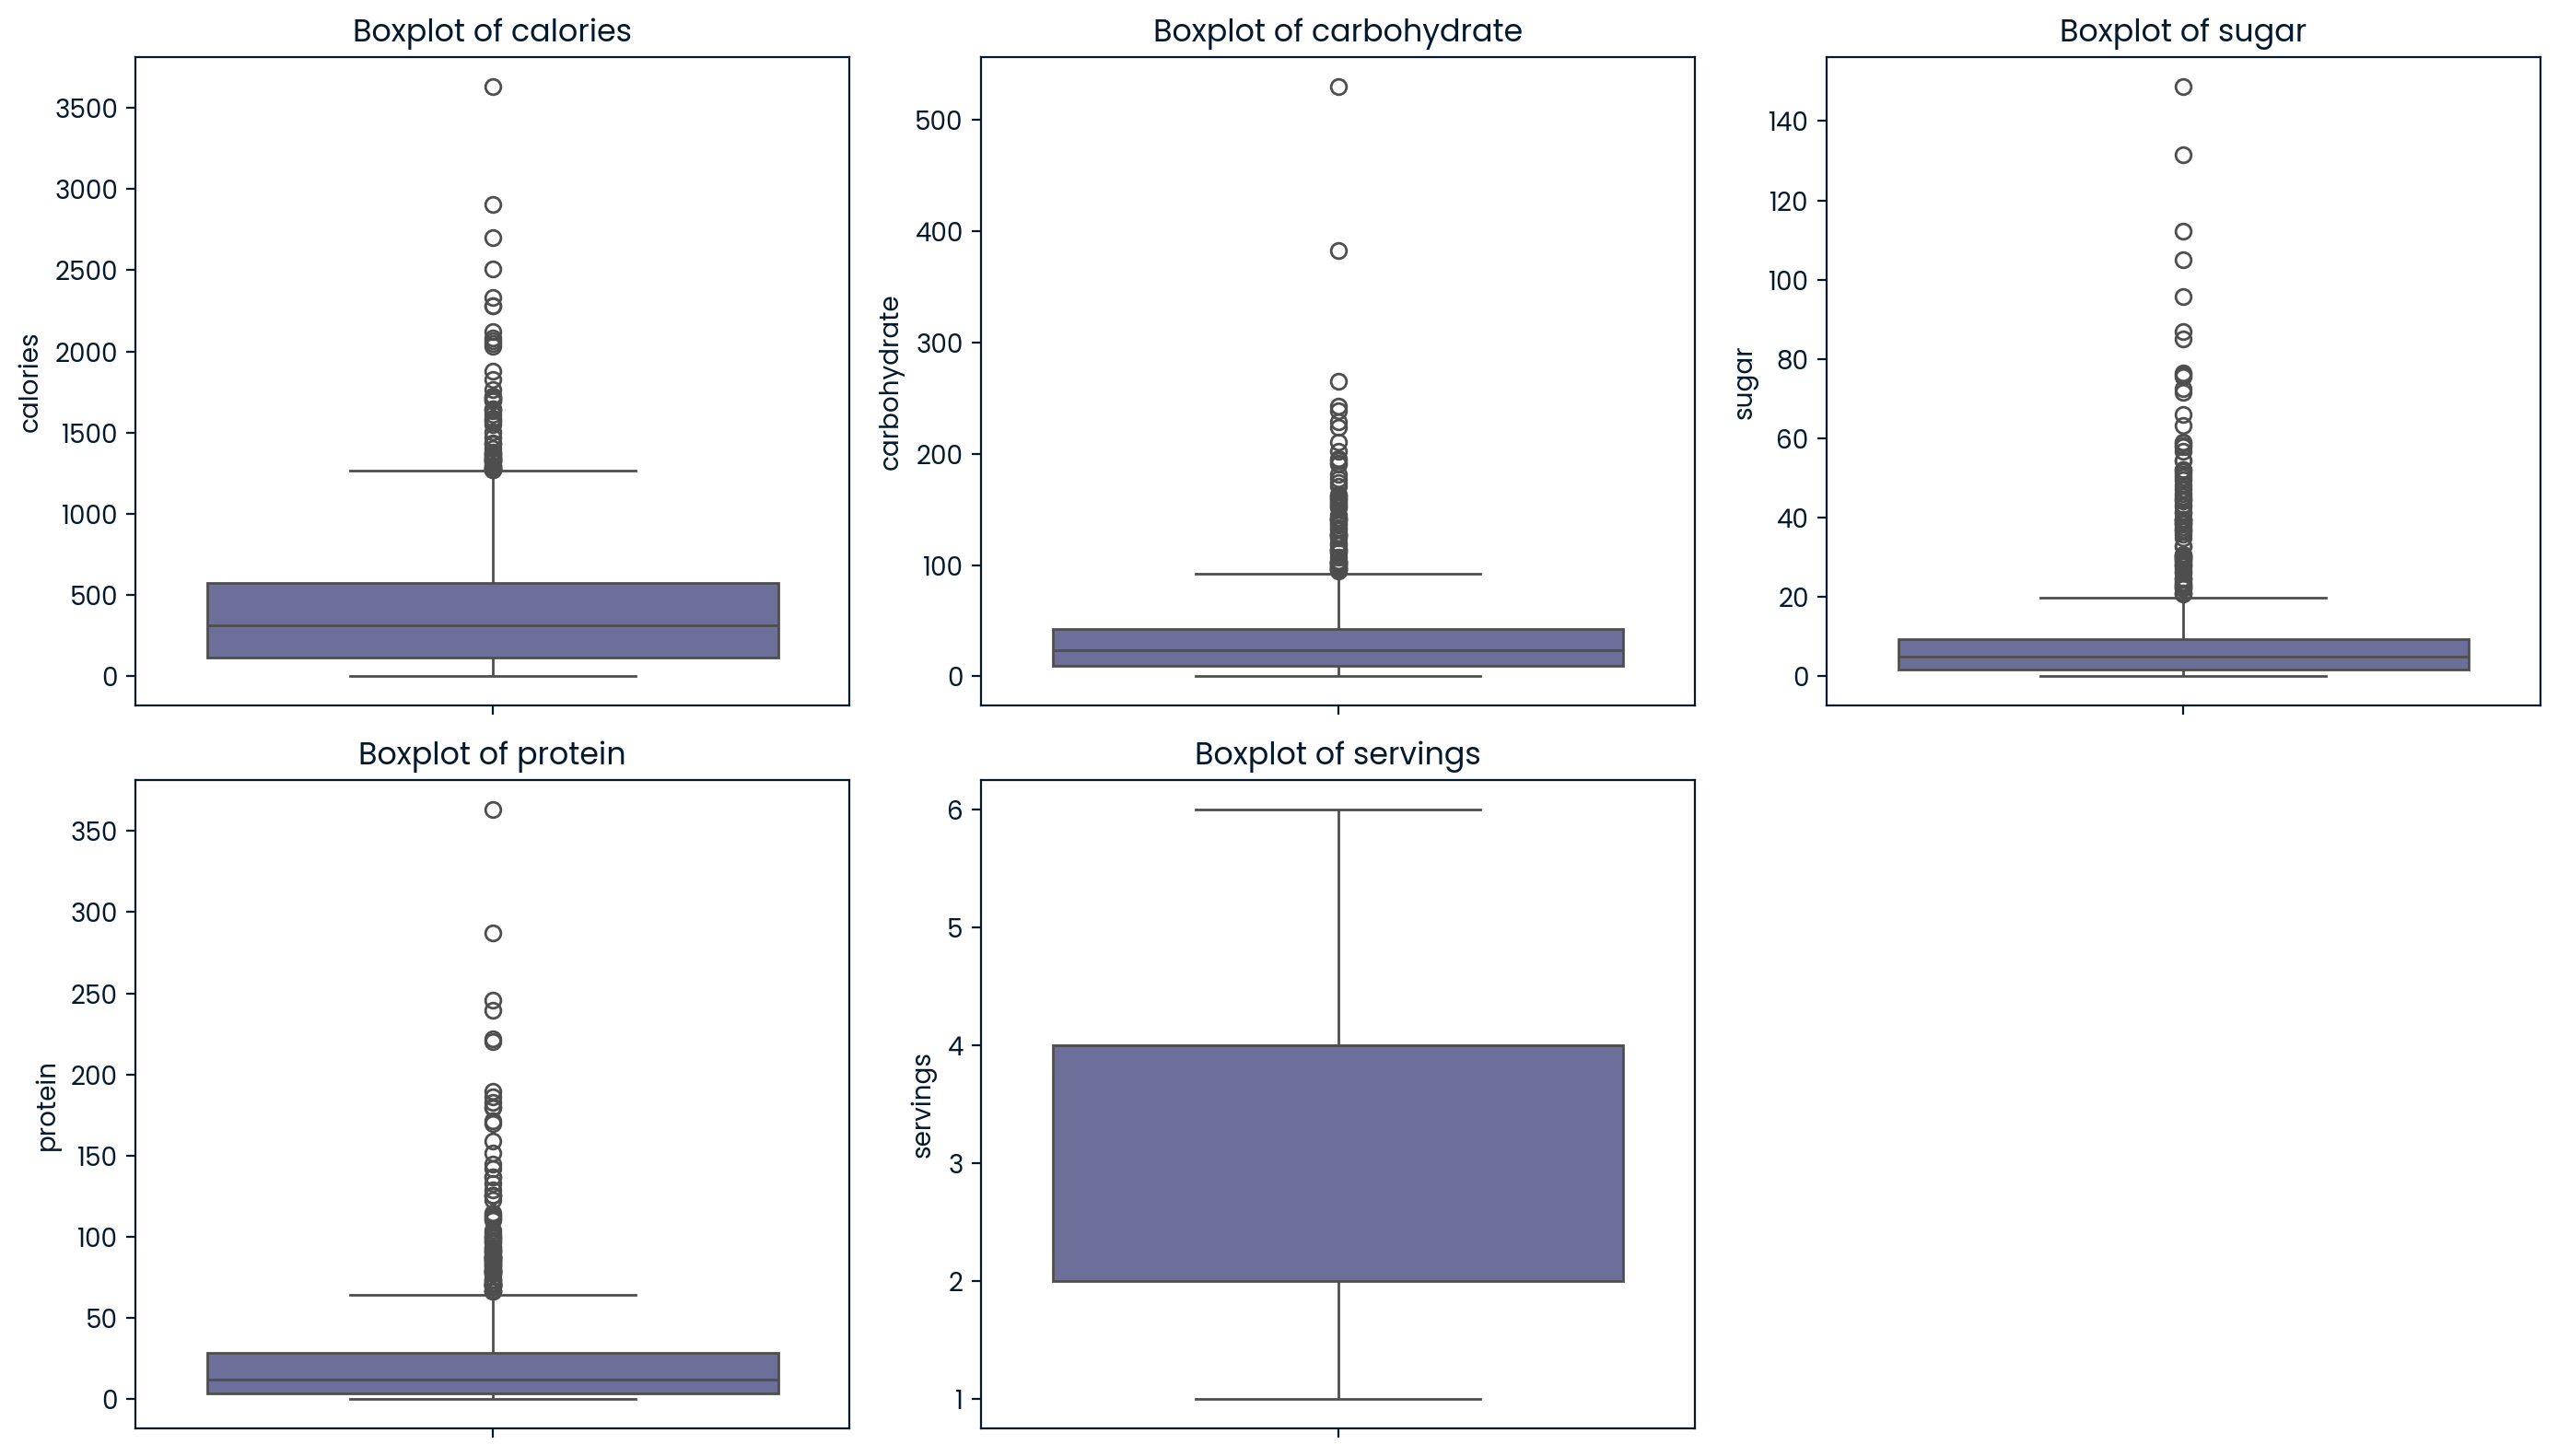

In [88]:
# Convert nutritional values to numeric if needed
numeric_cols = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
df = df.dropna()  # Or use imputation based on analysis

# Standardize categorical variables
df['high_traffic'] = df['high_traffic'].fillna('Not High')
df['high_traffic'] = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)  # Binary encoding

# Check for outliers
def plot_boxplots(df, cols):
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(cols):
        plt.subplot(2, 3, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_cols)

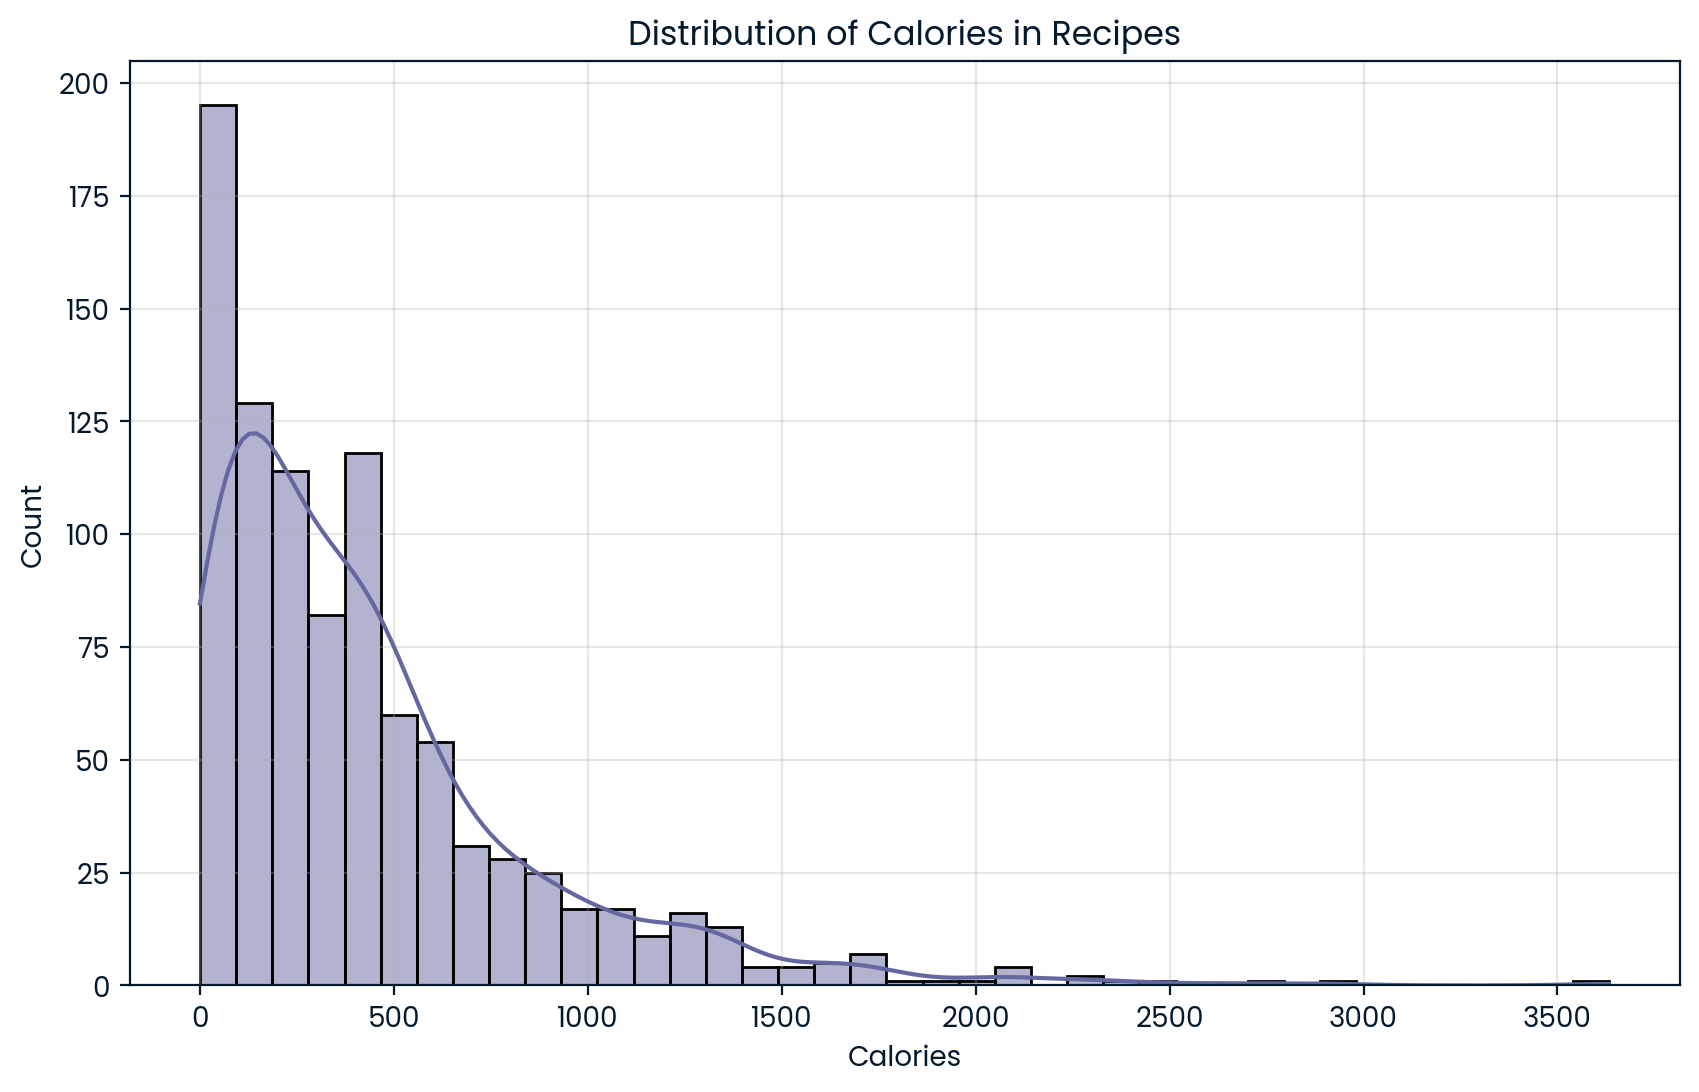

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], kde=True)
plt.title('Distribution of Calories in Recipes')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

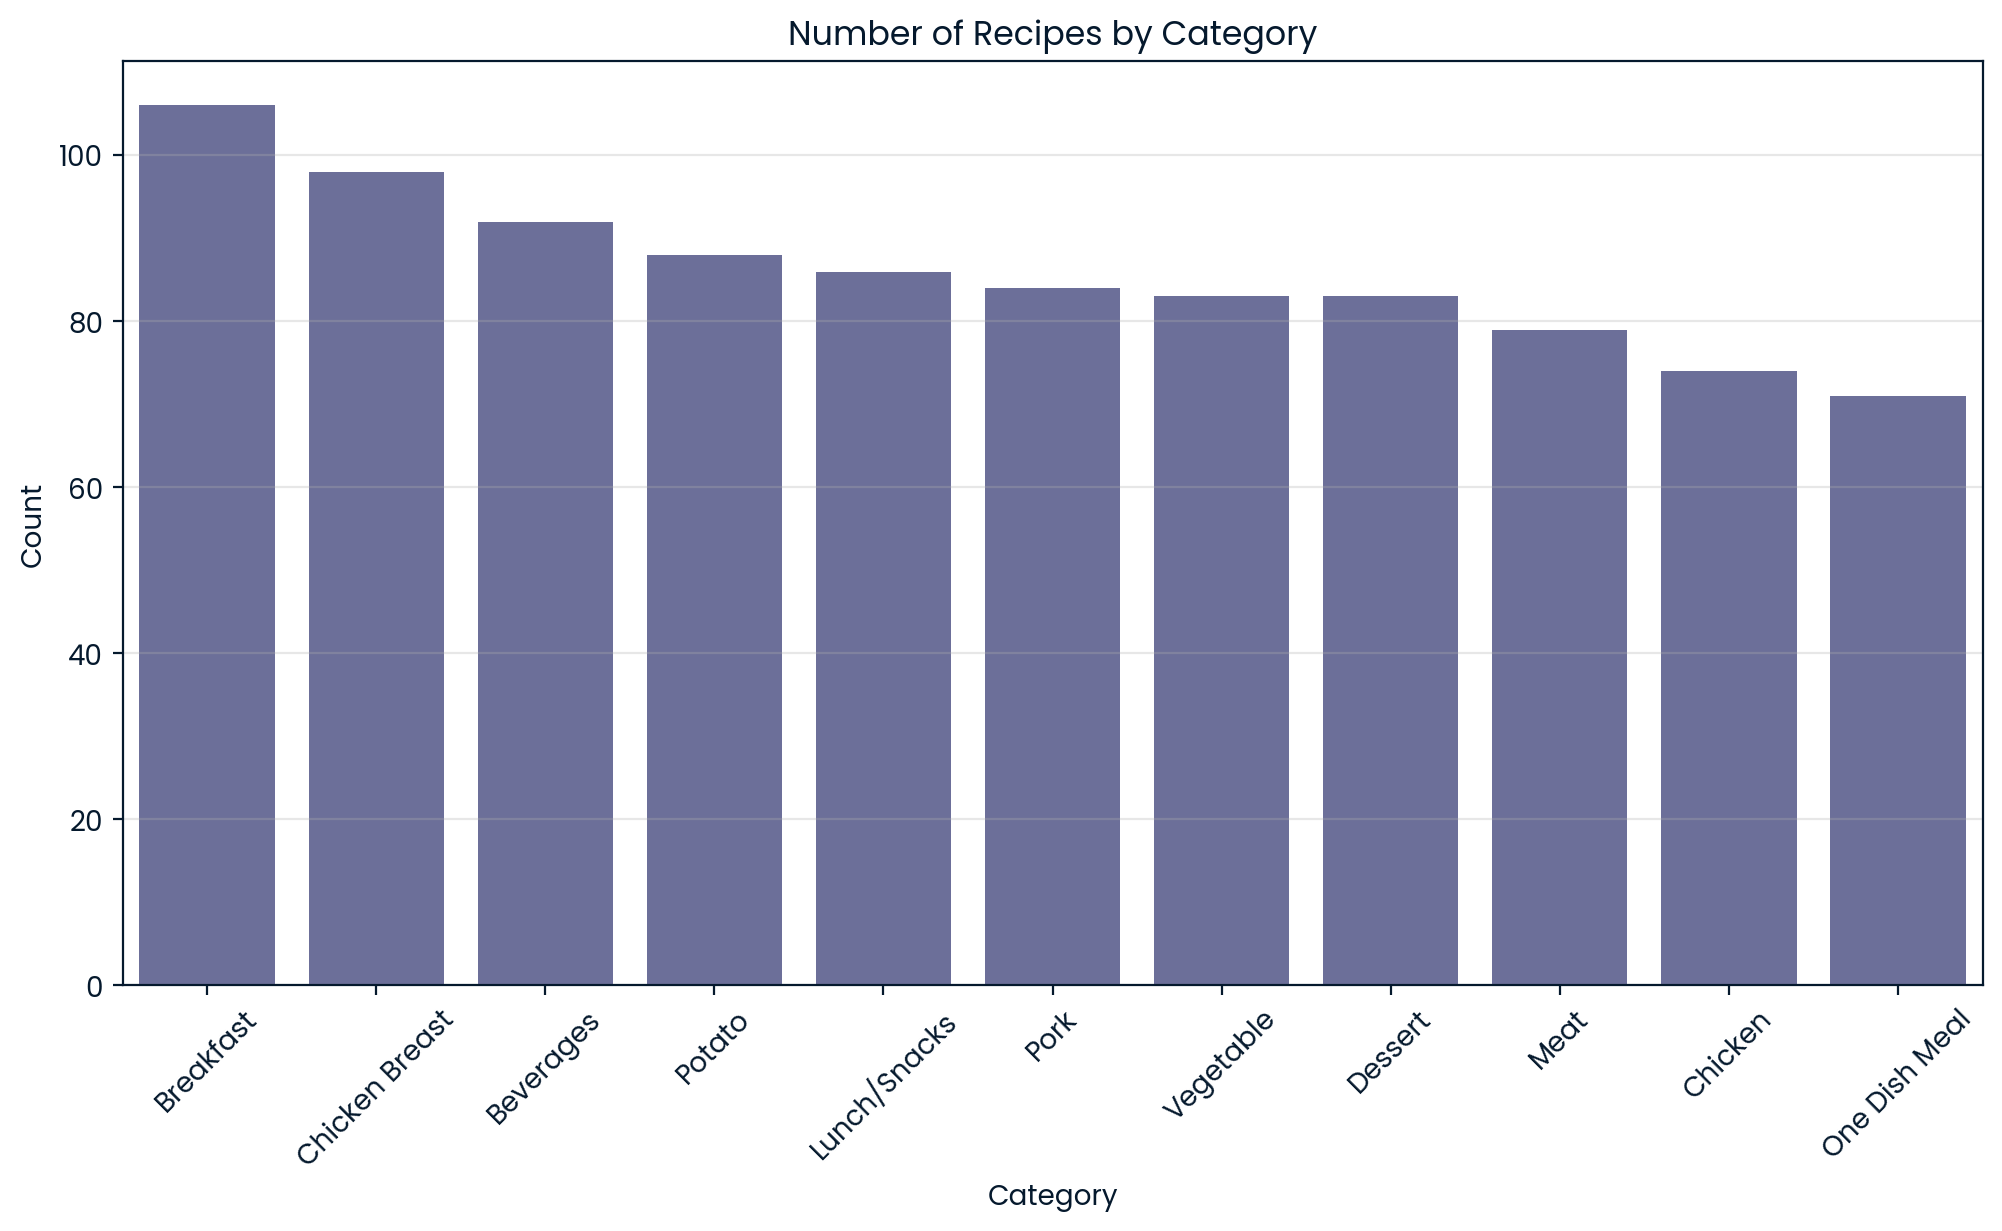

In [90]:
plt.figure(figsize=(12, 6))
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Recipes by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

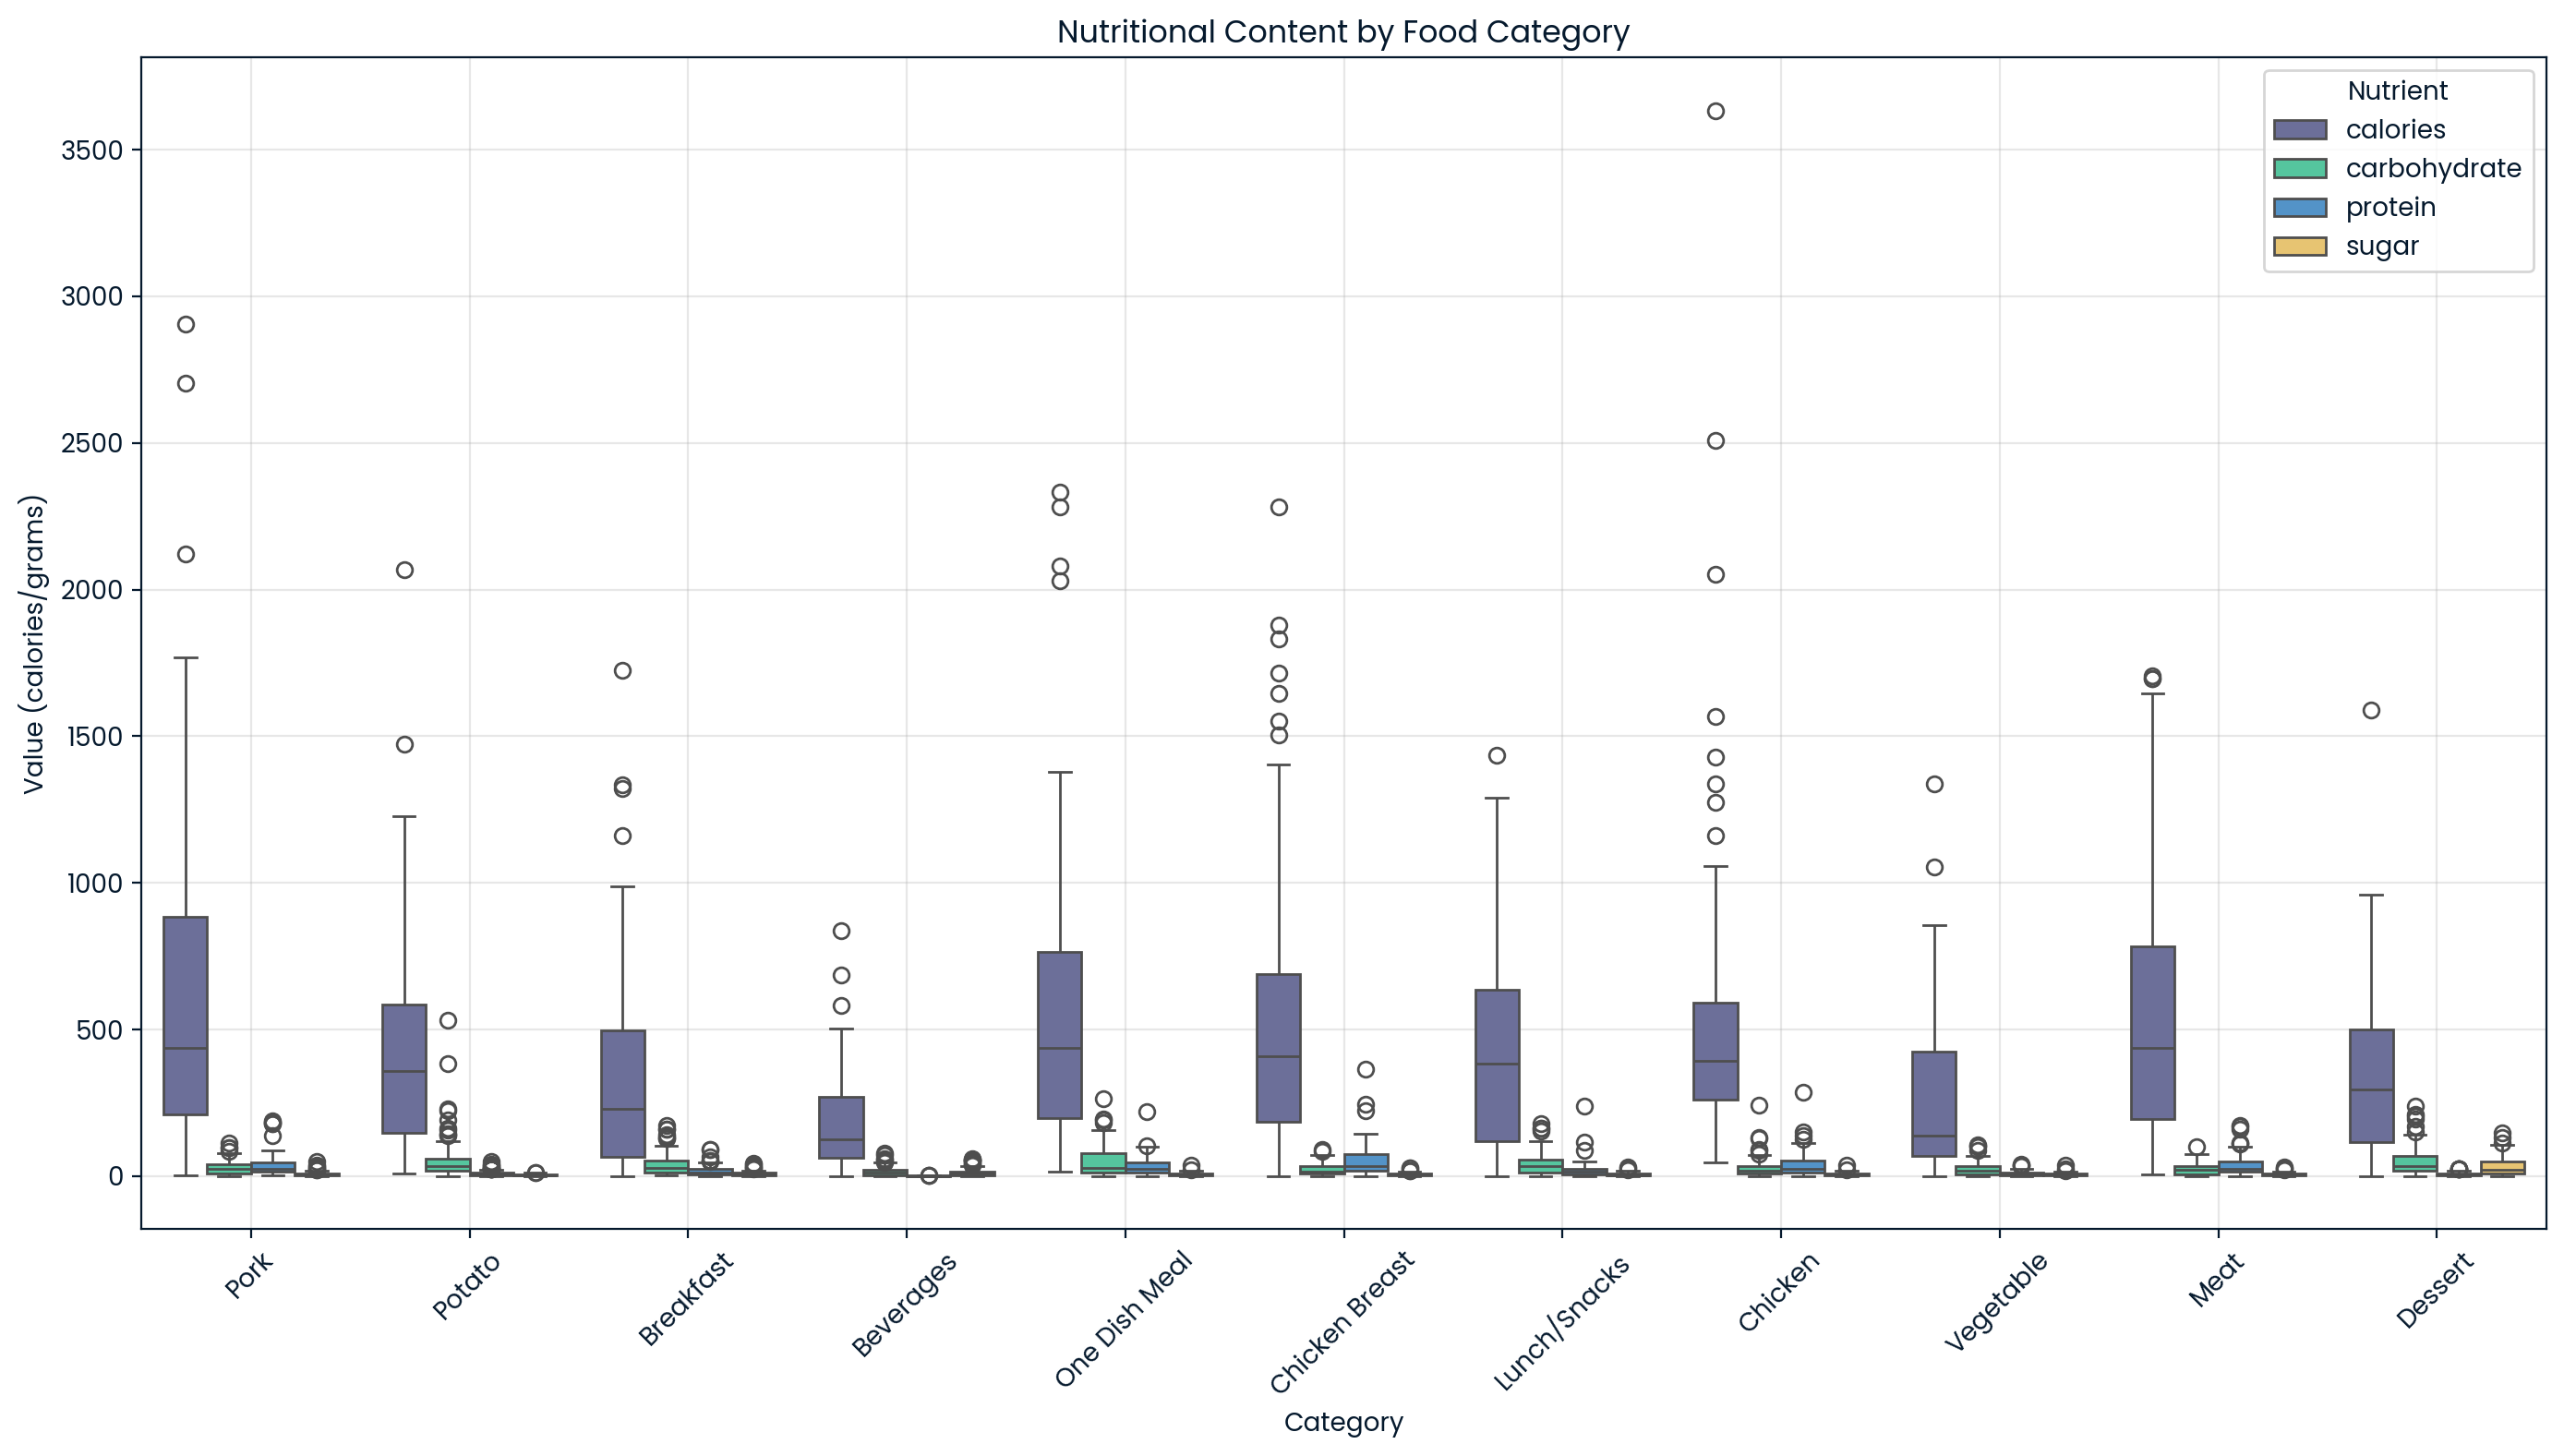

In [91]:
plt.figure(figsize=(14, 8))
nutritional_cols = ['calories', 'carbohydrate', 'protein', 'sugar']
melted_df = pd.melt(df, id_vars=['category'], value_vars=nutritional_cols, 
                    var_name='Nutrient', value_name='Value')

sns.boxplot(x='category', y='Value', hue='Nutrient', data=melted_df)
plt.title('Nutritional Content by Food Category')
plt.xlabel('Category')
plt.ylabel('Value (calories/grams)')
plt.xticks(rotation=45)
plt.legend(title='Nutrient')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

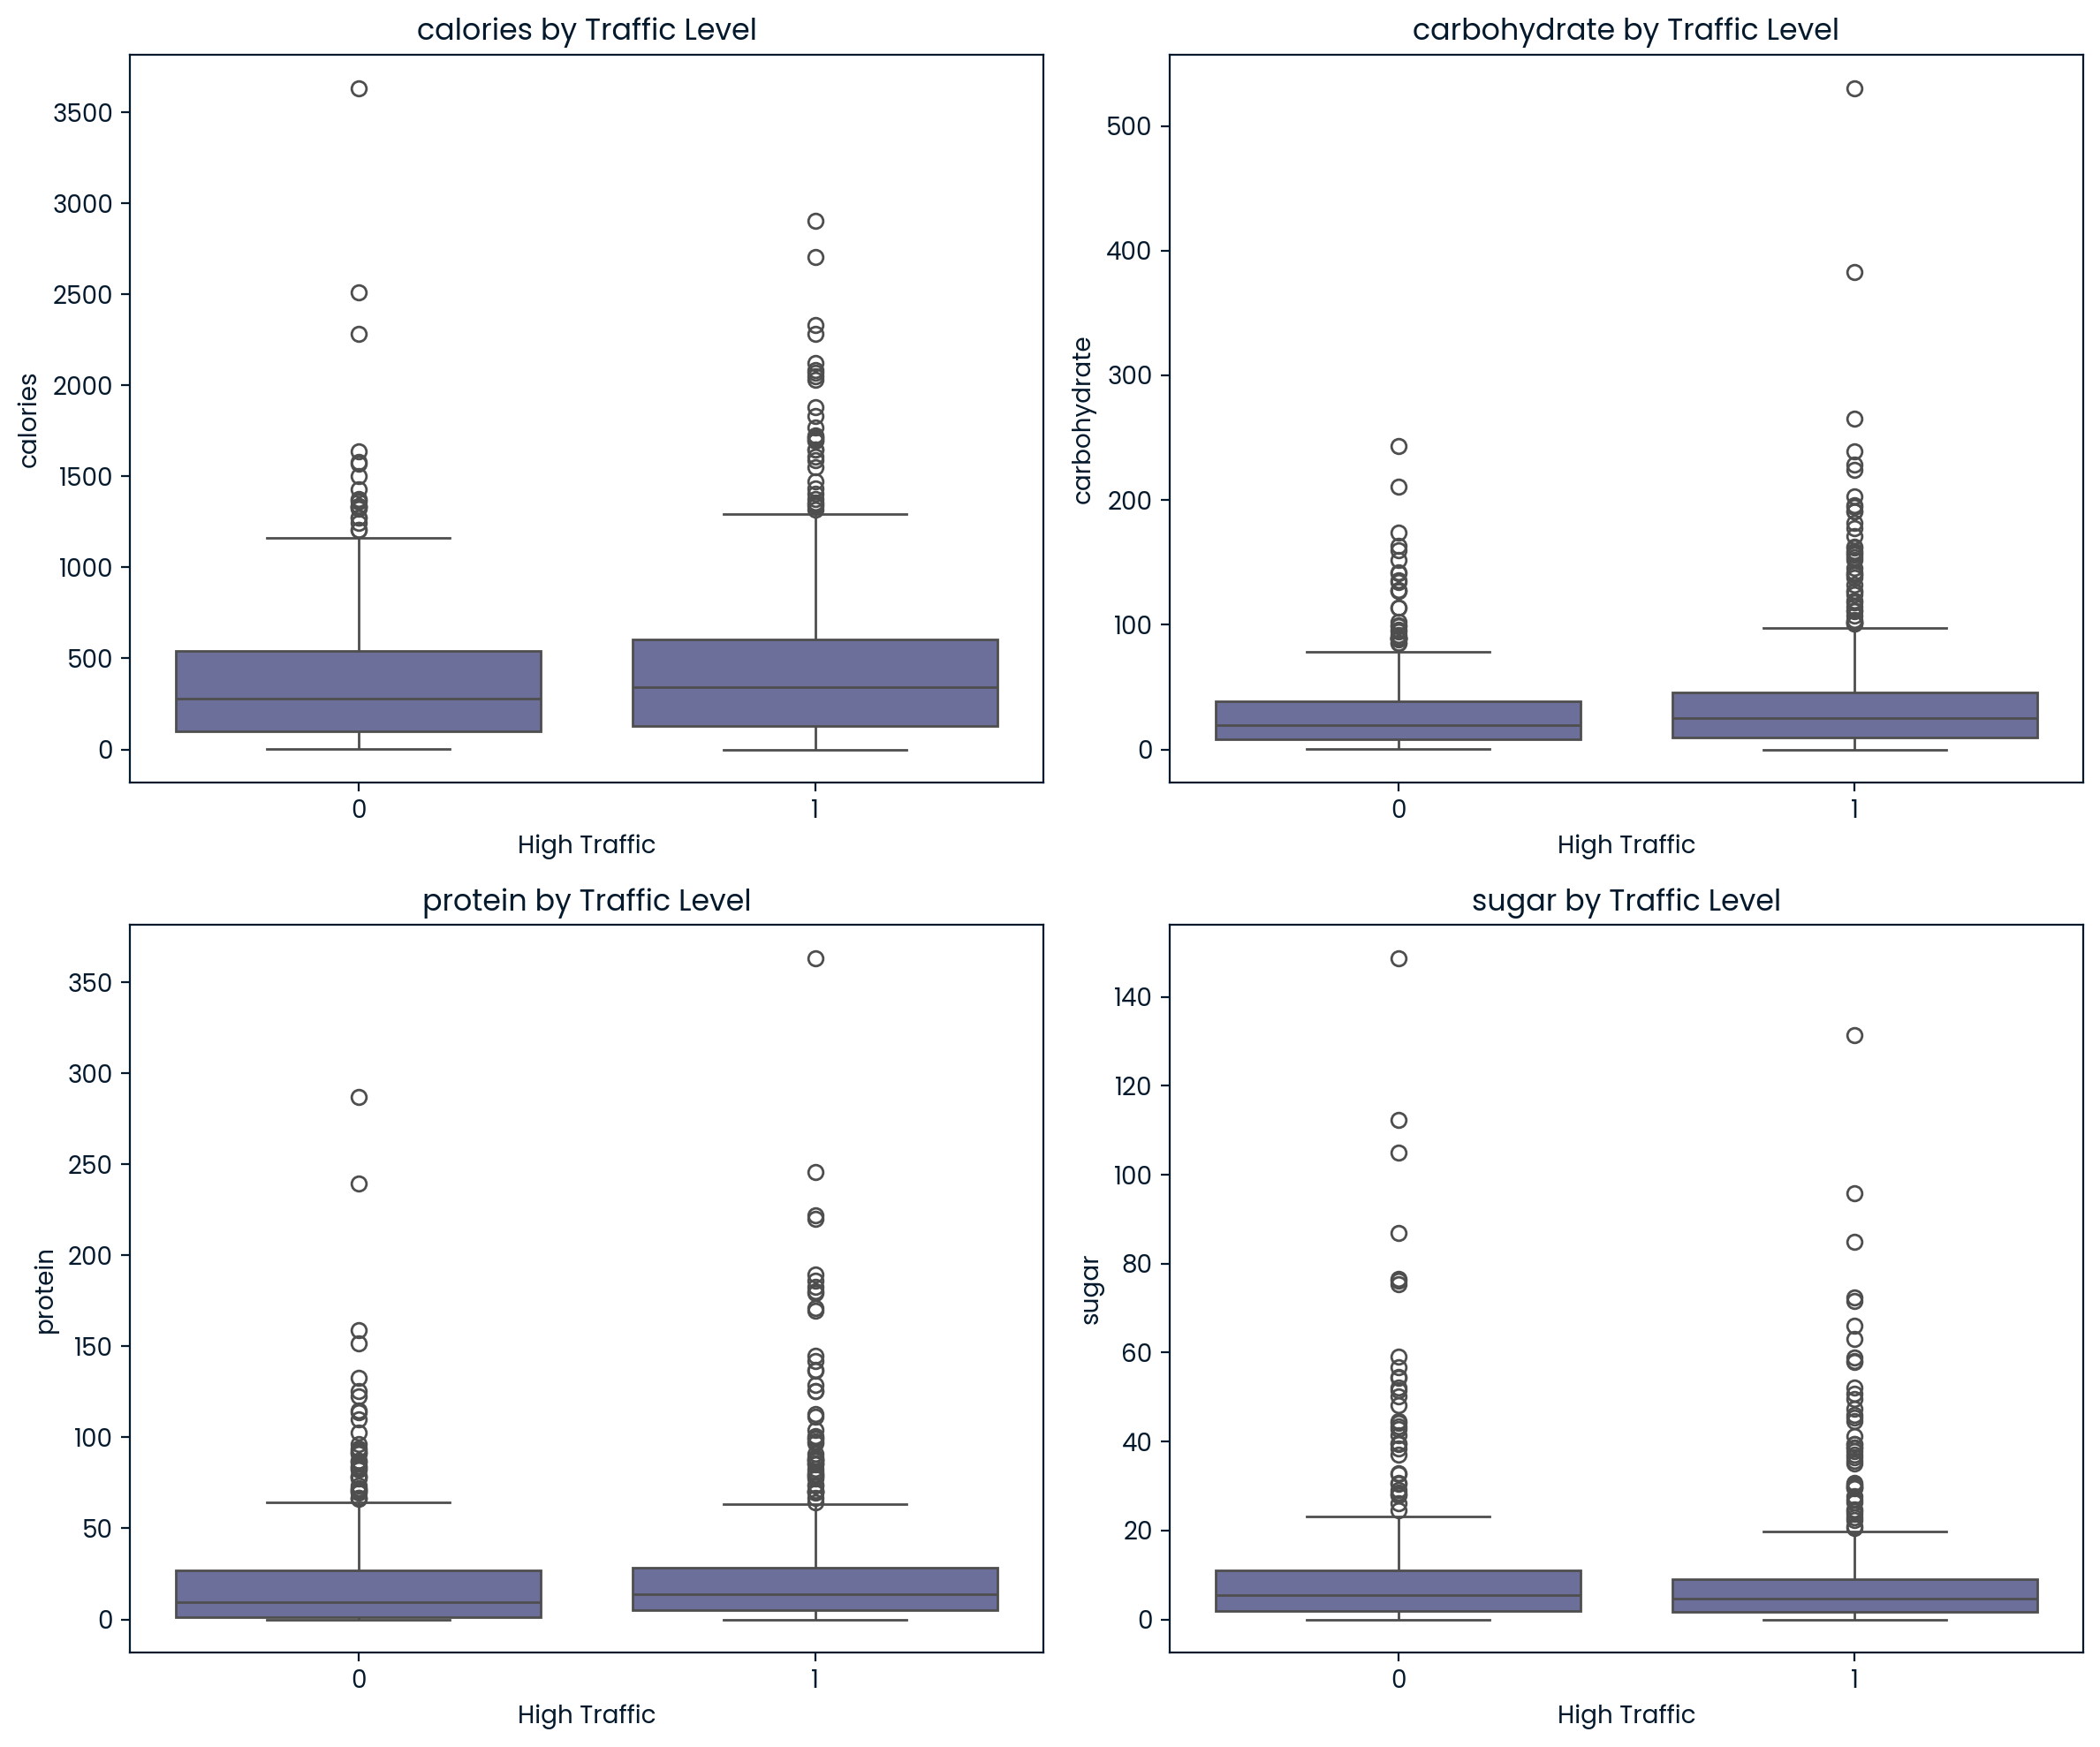

In [92]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(nutritional_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='high_traffic', y=col, data=df)
    plt.title(f'{col} by Traffic Level')
    plt.xlabel('High Traffic')
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

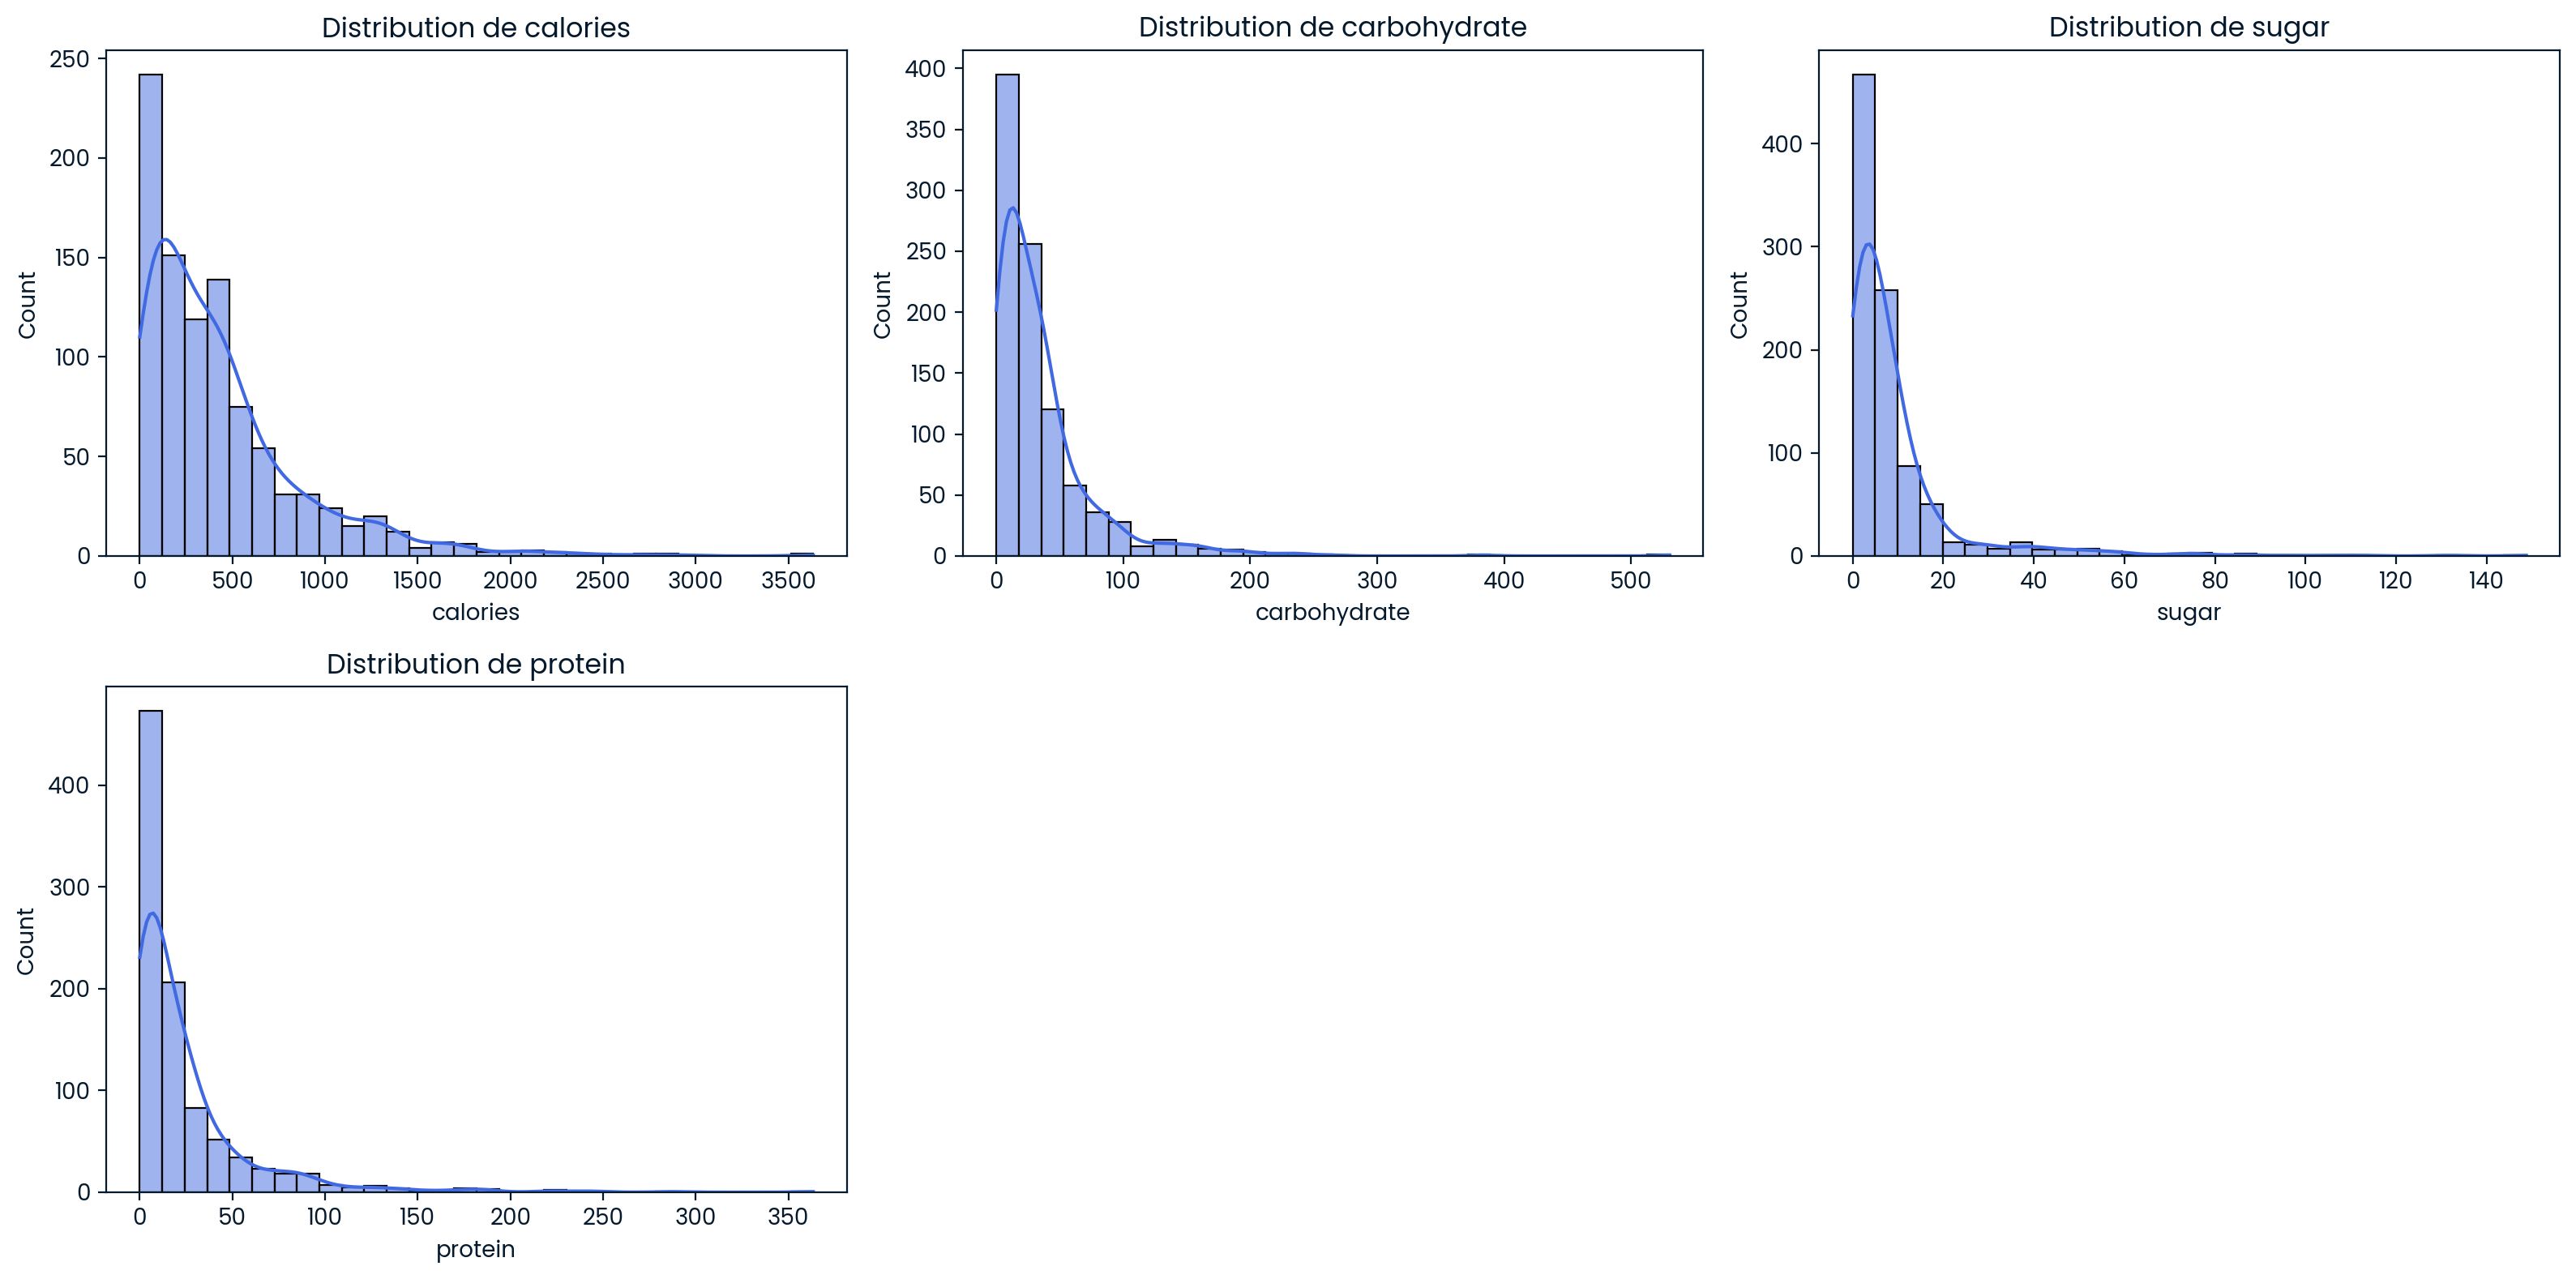

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables numériques
numeric_cols = ['calories', 'carbohydrate', 'sugar', 'protein']

plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='royalblue', edgecolor='black')
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()

In [94]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column in the DataFrame
df['category'] = label_encoder.fit_transform(df['category'])

# Display the first few rows to verify the encoding
print(df.head())

   recipe    calories  carbohydrate  ...  category  servings  high_traffic
0       1  435.939196     35.069676  ...         8       6.0             1
1       2   35.480000     38.560000  ...         9       4.0             1
2       3  914.280000     42.680000  ...         1       1.0             0
3       4   97.030000     30.560000  ...         0       4.0             1
4       5   27.050000      1.850000  ...         0       4.0             0

[5 rows x 8 columns]


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Feature selection
X = df.iloc[:, 1:-2]
y = df['high_traffic']

print(y.nunique())

#Scale
scaler = StandardScaler()
X = scaler.fit_transform(X,y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.2,random_state=42)
print(X_train.shape)

# Train baseline model with class weight handling
baseline_model = LogisticRegression(class_weight='balanced', max_iter=1000)
baseline_model.fit(X_train, y_train)

# Evaluate baseline model
y_pred_baseline = baseline_model.predict(X_test)
print("Baseline Model: Logistic Regression")
print(classification_report(y_test, y_pred_baseline))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))
print(f"Accuray: {baseline_model.score(X_test, y_test)}")                    
print(f"ROC AUC Score: {roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1])}")

2
(755, 5)
Baseline Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.66      0.80      0.72        74
           1       0.85      0.74      0.79       115

    accuracy                           0.76       189
   macro avg       0.76      0.77      0.76       189
weighted avg       0.78      0.76      0.76       189


Confusion Matrix:
[[59 15]
 [30 85]]
Accuray: 0.7619047619047619
ROC AUC Score: 0.854876615746181


Comparison Model: Random Forest
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        74
           1       0.78      0.72      0.75       115

    accuracy                           0.71       189
   macro avg       0.70      0.71      0.70       189
weighted avg       0.72      0.71      0.71       189


Confusion Matrix:
[[51 23]
 [32 83]]
Accuray: 0.708994708994709
ROC AUC Score: 0.7890716803760284


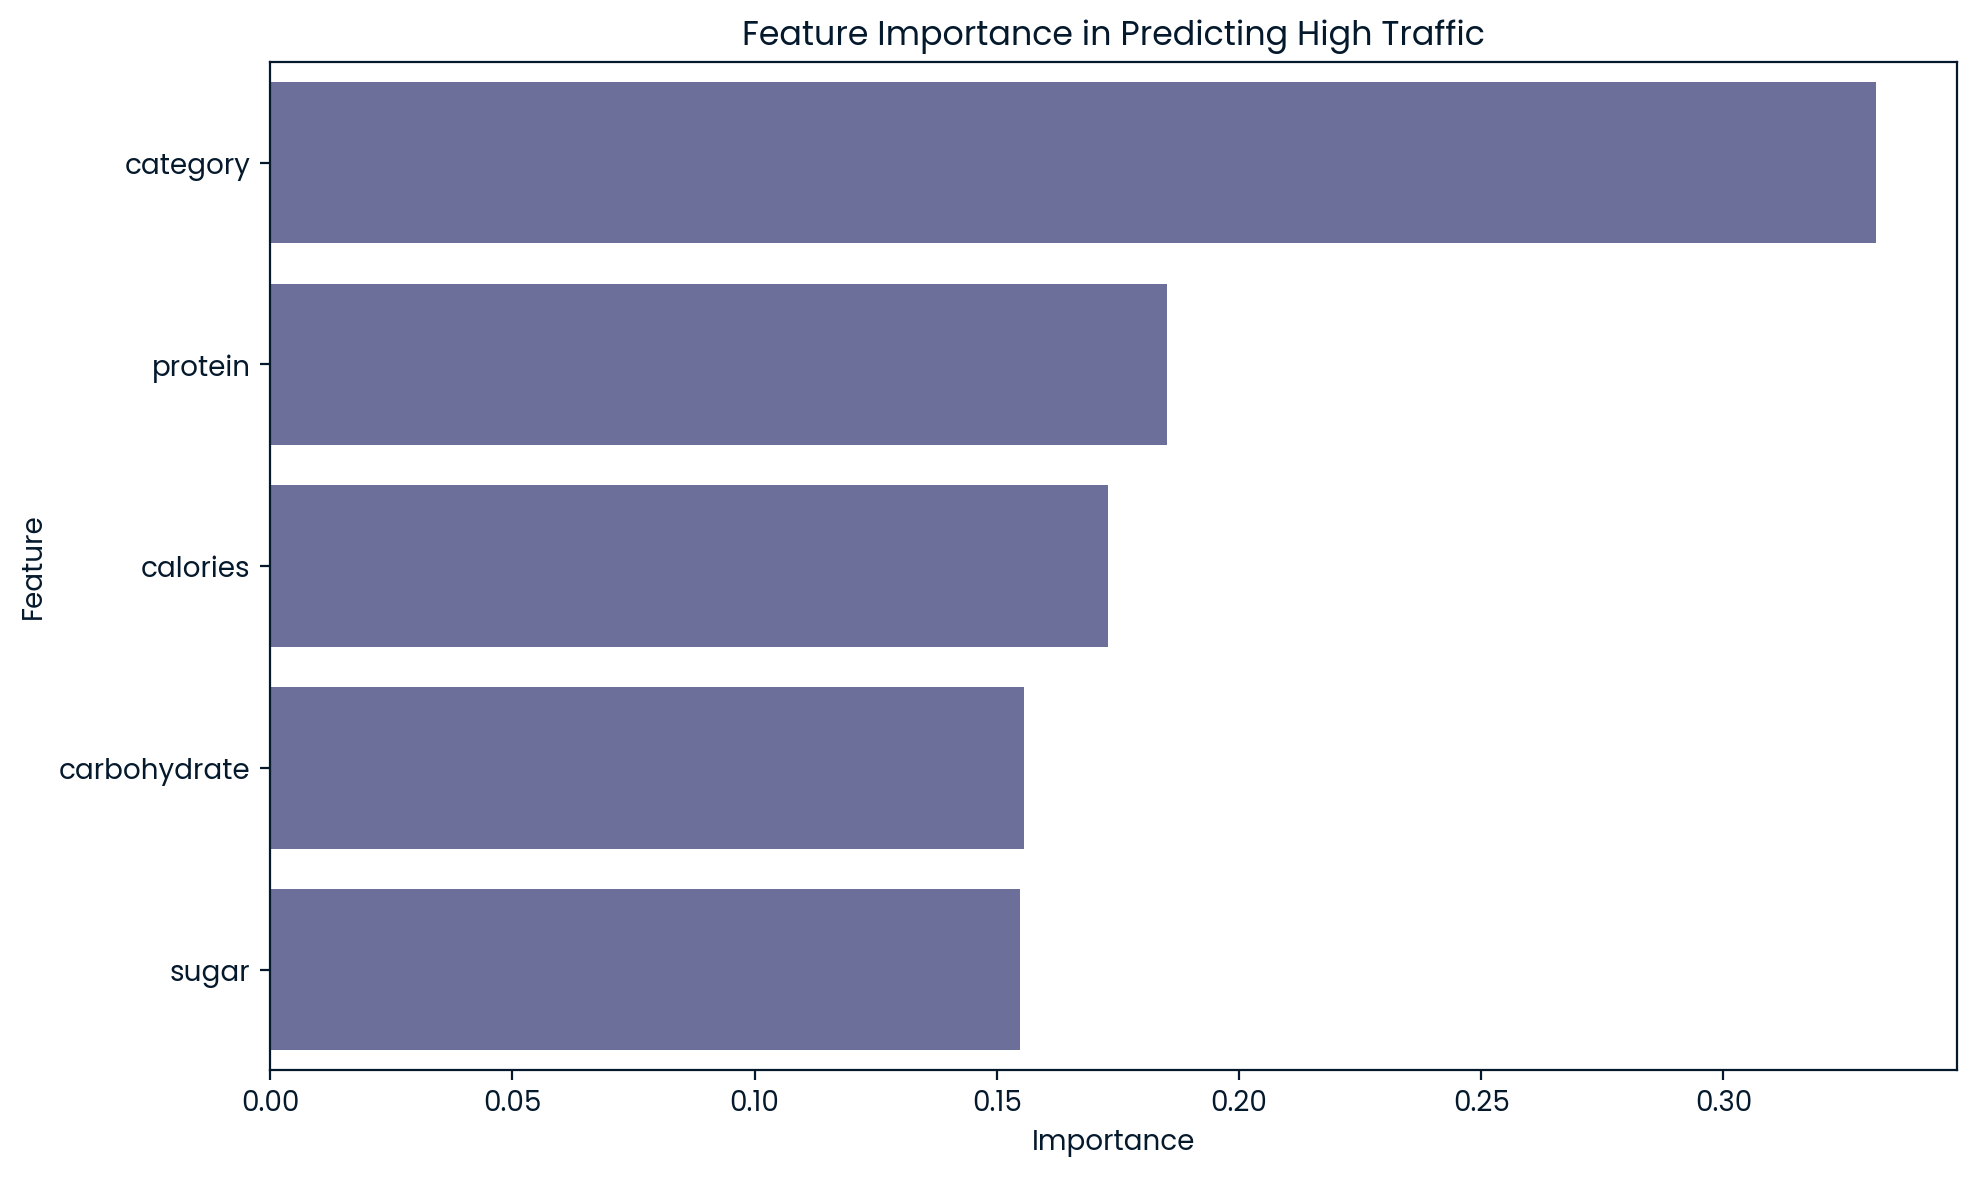

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Train comparison model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42,class_weight="balanced")
rf_model.fit(X_train, y_train)

# Evaluate comparison model
y_pred_rf = rf_model.predict(X_test)
print("Comparison Model: Random Forest")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"Accuray: {rf_model.score(X_test, y_test)}")  
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])}")

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': df.iloc[:, 1:-2].columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Predicting High Traffic')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation